In [1]:
# общие импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
import statistics as stat

plt.rc('axes', axisbelow=True)

Размер тренировочной базы выигрышей//проигрышей: 620 // 329, доля тестов от всего датасета: 1.0%
Размер тренировочной базы выигрышей//проигрышей: 601 // 319, доля тестов от всего датасета: 4.0%
Размер тренировочной базы выигрышей//проигрышей: 583 // 309, доля тестов от всего датасета: 7.000000000000001%
Размер тренировочной базы выигрышей//проигрышей: 564 // 299, доля тестов от всего датасета: 10.0%
Размер тренировочной базы выигрышей//проигрышей: 545 // 289, доля тестов от всего датасета: 13.0%
Размер тренировочной базы выигрышей//проигрышей: 526 // 279, доля тестов от всего датасета: 16.0%
Размер тренировочной базы выигрышей//проигрышей: 508 // 269, доля тестов от всего датасета: 19.0%
Размер тренировочной базы выигрышей//проигрышей: 489 // 259, доля тестов от всего датасета: 22.0%
Размер тренировочной базы выигрышей//проигрышей: 470 // 249, доля тестов от всего датасета: 25.0%
Размер тренировочной базы выигрышей//проигрышей: 451 // 240, доля тестов от всего датасета: 28.000000000000

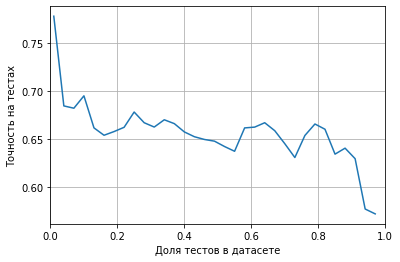

In [70]:
# Задание 1
# крестики-нолики наивным байесовским классификатором

# имена столбцов для переименовывания
col_names = ['x11', 'x12', 'x13', 'x21', 'x22', 'x23', 'x31', 'x32', 'x33', 'res']

# шаблон для подсчёта статистики
stat_patt = pos_stat = pd.DataFrame({'x': [0, 0, 0, 0, 0, 0, 0, 0, 0], 
                                     'o': [0, 0, 0, 0, 0, 0, 0, 0, 0], 
                                     'b': [0, 0, 0, 0, 0, 0, 0, 0, 0]}).T
stat_patt += 10**(-7)
stat_patt.columns = col_names[:-1]

# чтение данных
data = pd.read_csv('lab1_data/tic_tac_toe.txt', sep=',', header=None)
data.columns = col_names
data = data.sample(frac=1.)

pos_samp_num = len(data[data['res'] == 'positive'])
neg_samp_num = len(data[data['res'] == 'negative'])

# классы для предсказаний
classes = data['res'].unique()    


def train(data):
    classifier = []
    for cls in classes:
        curr_data = data[data['res'] == cls].loc[:,'x11':'x33']
        #print (curr_data)
        stat = pd.DataFrame.copy(stat_patt)
        
        for _, row in curr_data.iterrows():
            for col in col_names[:-1]:
                stat.loc[row.loc[col], col] += 1
                
        classifier.append((cls, stat/len(curr_data)))
        
    return classifier

def test(classifier, test_sample):
    pred_column = {'predicted': [], 'probability': []}
    for _, sample in test_sample.iterrows():
        max_prob = 0.
        pred_label = 'none'
        for name, cls in classifier:
            curr_prob = 1.
            for col in col_names[:-1]:
                curr_prob *= cls.loc[sample.loc[col], col]
            if (curr_prob > max_prob):
                max_prob = curr_prob
                pred_label = name
        pred_column['predicted'].append(pred_label)
        pred_column['probability'].append(max_prob)
    return test_sample.join(pd.DataFrame(pred_column))
   

# головная программа

sample_sizes = [i/100 for i in range(1, 100, 3)]
accuracies = []

for test_size in sample_sizes:
    
    # формирование тестовой базы
    test_data = data[data['res'] == 'positive'][: int(test_size * pos_samp_num)]
    test_data = test_data.append(data[data['res'] == 'negative'][: int(test_size * neg_samp_num)])
    test_data.reset_index(inplace=True, drop=True)

    # формирование тренировочной базы 
    train_data = data[data['res'] == 'positive'][int(test_size * pos_samp_num):]
    train_data = train_data.append(data[data['res'] == 'negative'][int(test_size * neg_samp_num):])
    train_data.reset_index(inplace=True, drop=True)

    # небольшие сведения
    print('Размер тренировочной базы выигрышей//проигрышей: {} // {}, доля тестов от всего датасета: {}%'
          .format(len(train_data[train_data['res'] == 'positive']),
                  len(train_data[train_data['res'] == 'negative']),
                  test_size * 100))

    classifier = train(train_data)
    res = test(classifier, test_data)

    #
    acc = 0
    for _, row in res.iterrows():
        if (row['res'] == row['predicted']):
            acc += 1
        
    accuracies.append(acc / len(test_data))

plt.plot(sample_sizes, accuracies)
plt.xlabel('Доля тестов от датасета')
plt.ylabel('Точность на тестах')
plt.xlim(0, 1)
plt.grid()
plt.show()

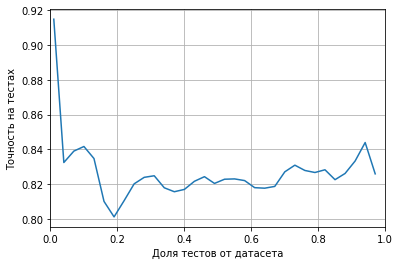

In [97]:
# классификатор спама
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

test_sizes = [i/100 for i in range(1, 100, 3)]
accs = []

data = pd.read_csv('lab1_data/spam.csv').drop(['Unnamed: 0'], axis=1).sample(frac=1.)
X_data = data.iloc[:, :-1].to_numpy()
Y_data = LabelEncoder().fit_transform(data[:]['type'].to_numpy())

for test_size in sample_sizes:
    
    X, X_t, Y, Y_t = train_test_split(X_data, Y_data, test_size=test_size, shuffle=False)
    
    gnb = GaussianNB()
    gnb.fit(X, Y)
    
    accs.append(accuracy_score(Y_t, gnb.predict(X_t)))
    
pict = plt.plot(sample_sizes, accs)
plt.xlabel('Доля тестов от датасета')
plt.ylabel('Точность на тестах')
plt.xlim(0, 1)
plt.grid()
plt.show()

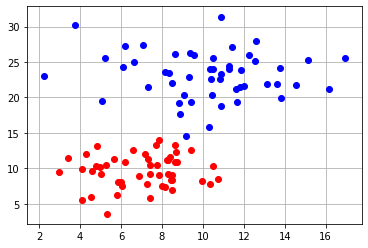

In [84]:
# Задание 2.
# Сгенерируйте 100 точек с двумя признаками X1 и X2 в соответствии с нормальным распределением так,
# что одна и вторая часть точек (класс -1 и класс 1) имеют параметры: мат. ожидание X1, мат. ожидание X2,
# среднеквадратические отклонения для обеих переменных, 
# (Кл +1: N=50, Mx1=7, Mx2=10, D=2; Кл -1: N=50, Mx1=10, Mx2=23, D=3).
# Построить диаграммы, иллюстрирующие данные. Построить Байесовский классификатор и оценить качество 
# классификации с помощью различных методов (точность, матрица ошибок, ROС и PR-кривые).

# class +1
Na = 50
Da = 2
Max1 = 7
Max2 = 10
# class -1
Nb = 50
Db = 3
Mbx1 = 10
Mbx2 = 23

a_x1 = np.random.normal(Max1, Da, Na)
a_x2 = np.random.normal(Max2, Da, Na)
b_x1 = np.random.normal(Mbx1, Db, Nb)
b_x2 = np.random.normal(Mbx2, Db, Nb)

pict = plt.figure()
pict = plt.scatter(a_x1, a_x2, color='red')
pict = plt.scatter(b_x1, b_x2, color='blue')
pict = plt.grid(True)

plt.show()

In [41]:
# построение классификатора
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, roc_curve, auc, precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve
#from sklearn.metrics import plot_roc_curve

Y_data = np.array([1]*Na + [-1]*Nb)
X_data = np.concatenate((np.stack((a_x1, a_x2), axis=1), np.stack((b_x1, b_x2), axis=1)), axis=0)

X, X_t, Y, Y_t = train_test_split(X_data, Y_data, test_size=0.2, shuffle=True)

classifier = GaussianNB()
classifier.fit(X, Y)

print(f'Точность  обуч//тест: {accuracy_score(classifier.predict(X), Y)}//{accuracy_score(classifier.predict(X_t), Y_t)}')
conf_matr = pd.DataFrame(confusion_matrix(Y_t, classifier.predict(X_t)), index=['+1', '-1'], columns=['+1', '-1'])
conf_matr
# ЪУЪ

Точность  обуч//тест: 1.0//1.0


,Pos,Neg
Pos,10,0
Neg,0,10


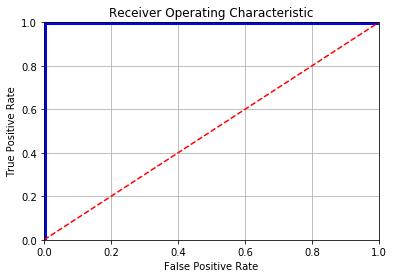

In [32]:
probs = classifier.predict_proba(X_t)
preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(Y_t, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, linewidth=5)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()

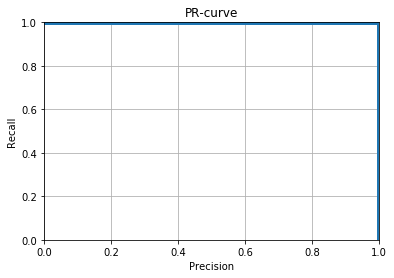

In [30]:
precision, recall, thresholds = precision_recall_curve(Y_t, preds)
precision = np.insert(precision, 0, 0)
recall = np.insert(recall, 0 , 1)
plt.title('PR-curve')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(precision, recall, '-', linewidth=5)
plt.grid(True)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [130]:
# Задание 3. 
# Постройте классификатор на основе метода k ближайших соседей для обучающего множества Glass (glass.csv).
# Посмотрите заголовки признаков и классов. Перед построением классификатора необходимо также удалить первый
# признак Id number, который не несет никакой информационной нагрузки. 
#       a. Постройте графики зависимости ошибки классификации от количества ближайших соседей.
#       b. Определите подходящие метрики расстояния и исследуйте, как тип метрики расстояния влияет
#          на точность классификации.
#       c. Определите, к какому типу стекла относится экземпляр с характеристиками:
#          RI=1.516 Na=11.7 Mg=1.01 Al=1.19 Si=72.59 K=0.43 Ca=11.44 Ba=0.02 Fe=0.1

data = pd.read_csv('lab1_data/glass.csv').sample(frac=1.)
test_data = data[: int(.2 * len(data))]
train_data = data[int(.2 * len(data)): ]
#data = data.drop('Id', axis=1)
#data = data.sample(frac=0.1)

# евклидово расстояние
def euql_dist(rowA , rowB ): 
    return sum( (rowA['RI': 'Fe'] - rowB['RI': 'Fe'])**2)

# косинусная мера
def cos_dist(rowA, rowB):
    return sum(rowA['RI': 'Fe'] * rowB['RI': 'Fe']) / (sum(rowA['RI': 'Fe']**2) * sum(rowB['RI': 'Fe']**2) )**0.5

# манхэттенское 
def manh_dist(rowA, rowB):
    return sum(abs(rowA['RI': 'Fe'] - rowB['RI': 'Fe']))

# Чебышёва
def cheb_dist(rowA, rowB):
    return max(abs(rowA['RI': 'Fe'] - rowB['RI': 'Fe']))

def test(sample, K):
    distances = pd.DataFrame(columns=['Type', 'Euql_Dist', 'Cos_Dist', 'Manh_Dist', 'Cheb_Dist'], index=train_data.index, dtype=float)
    res = pd.Series(index=['Type', 'Pred_Euql', 'Pred_Cos', 'Pred_Manh', 'Pred_Cheb'], dtype=float)

    # цикл распознавания
    for idx, row in train_data.iterrows():
        distances.at[idx, 'Type'] = row['Type']
        distances.at[idx, 'Cheb_Dist'] = cheb_dist(row, sample)
        distances.at[idx, 'Manh_Dist'] = manh_dist(row, sample)
        distances.at[idx, 'Euql_Dist'] = euql_dist(row, sample)
        distances.at[idx, 'Cos_Dist'] = cos_dist(row, sample)
        
    # заполняем итоговую таблицу
    distances.sort_values(by=['Euql_Dist'], inplace=True, ascending=True)
    try:
        res['Pred_Euql'] = stat.mode(distances[0: K]['Type'])
    except:
        res['Pred_Euql'] = -1
        
    distances.sort_values(by=['Cos_Dist'], inplace=True, ascending=False)
    try:
        res['Pred_Cos'] = stat.mode(distances[0: K]['Type'])
    except:
        res['Pred_Cos'] = -1
        
    distances.sort_values(by=['Manh_Dist'], inplace=True, ascending=True)
    try: 
        res['Pred_Manh'] = stat.mode(distances[0: K]['Type'])
    except:
        res['Pred_Manh'] = -1
        
    distances.sort_values(by=['Cheb_Dist'], inplace=True, ascending=True)
    try:
        res['Pred_Cheb'] = stat.mode(distances[0: K]['Type'])
    except:
        res['Pred_Cheb'] = -1
        
    return res


In [131]:
# масивы для результатов точности
accs_euql = []
err_euql = []
accs_cos = []
err_cos = []
accs_manh = []
err_manh = []
accs_cheb = []
err_cheb = []

rep_len = len(test_data)

neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

for K in neighbours:

    # отчётная таблица
    report = pd.DataFrame(columns=['Type', 'Pred_Euql', 'Pred_Cos', 'Pred_Manh', 'Pred_Cheb'], 
                          index=test_data.index, dtype=float)

    # цикл подбора образцов
    for idx, sample in test_data.iterrows():
        samplereport = test(sample, K)
        
        #samplereport['Type'] = sample['Type']
        
        report.at[idx, 'Type'] = sample['Type']
        report.at[idx, 'Pred_Euql'] = samplereport['Pred_Euql']
        report.at[idx, 'Pred_Cos'] = samplereport['Pred_Cos']
        report.at[idx, 'Pred_Manh'] = samplereport['Pred_Manh']
        report.at[idx, 'Pred_Cheb'] = samplereport['Pred_Cheb']
        

    accs_euql.append(len(report[report['Pred_Euql'] == report['Type']]) / rep_len) 
    err_euql.append(len(report[report['Pred_Euql'] == -1]) / rep_len)
    accs_cos.append(len(report[report['Pred_Cos'] == report['Type']]) / rep_len)
    err_cos.append(len(report[report['Pred_Cos'] == -1]) / rep_len)
    accs_manh.append(len(report[report['Pred_Manh'] == report['Type']]) / rep_len)
    err_manh.append(len(report[report['Pred_Manh'] == -1]) / rep_len)
    accs_cheb.append(len(report[report['Pred_Cheb'] == report['Type']]) / rep_len)
    err_cheb.append(len(report[report['Pred_Cheb'] == -1]) / rep_len)
    

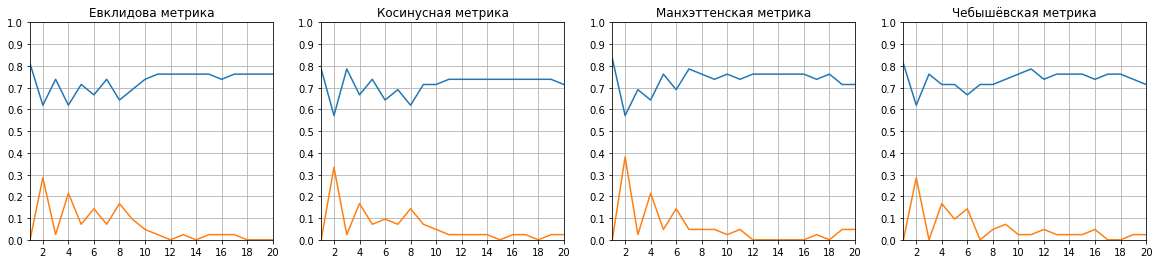

In [135]:
gridsize = (1, 4)
x_ticks = [i for i in range(0, 21, 2)]
y_ticks = [i/10 for i in range(0, 11)]
y_labels = [i/10 for i in range(0, 11, 2)]
fig = plt.figure(figsize=(20,4))
pict1 = plt.subplot2grid(gridsize, (0, 0))
pict1 = plt.plot(neighbours, accs_euql)
pict1 = plt.plot(neighbours, err_euql)
pict1 = plt.grid(True)
pict1 = plt.xticks(x_ticks, x_ticks)
pict1 = plt.yticks(y_ticks)
pict1 = plt.xlim(min(neighbours), max(neighbours))
pict1 = plt.ylim(0, 1)
pict1 = plt.title('Евклидова метрика')
    
pict2 = plt.subplot2grid(gridsize, (0, 1))
pict2 = plt.plot(neighbours, accs_cos)
pict2 = plt.plot(neighbours, err_cos)
pict2 = plt.xticks(x_ticks, x_ticks)
pict2 = plt.yticks(y_ticks)
pict2 = plt.grid(True)
pict2 = plt.xlim(min(neighbours), max(neighbours))
pict2 = plt.ylim(0, 1)
pict2 = plt.title('Косинусная метрика')
    
pict3 = plt.subplot2grid(gridsize, (0, 2))
pict3 = plt.plot(neighbours, accs_manh)
pict3 = plt. plot(neighbours, err_manh)
pict3 = plt.xticks(x_ticks, x_ticks)
pict3 = plt.yticks(y_ticks)
pict3 = plt.grid(True)
pict3 = plt.xlim(min(neighbours), max(neighbours))
pict3 = plt.ylim(0, 1)
pict3 = plt.title('Манхэттенская метрика')

pict4 = plt.subplot2grid(gridsize, (0, 3))
pict4 = plt.plot(neighbours, accs_cheb)
pict4 = plt.plot(neighbours, err_cheb)
pict4 = plt.xticks(x_ticks, x_ticks)
pict4 = plt.yticks(y_ticks)
pict4 = plt.grid(True)
pict4 = plt.xlim(min(neighbours), max(neighbours))
pict4 = plt.ylim(0, 1)
pict4 = plt.title('Чебышёвская метрика')
    
plt.show()
    
    

<p>
На графиках выше показаны точности тестов с различными метриками расстояния.
По горизонтали откладывается число используемых соседей, по вертикали -- процент совпадений с истиной.
Синей линией обозначена доля правильно определённых стёкол, а оранжевой -- доля случаев, когда "голоса" соседних элементов разделились поровну и мода отсутствует.
</p>
<p>
Как можно видеть, пик точности достигается при использовании лишь единственного ближайшего соседа, а с увеличением их числа опускается до 60%, притом используемая метрика расстояния не влияет на результат.</p>


In [139]:
# Определение нового типа стекла
# RI=1.516 Na=11.7 Mg=1.01 Al=1.19 Si=72.59 K=0.43 Ca=11.44 Ba=0.02 Fe=0.1
neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 40]
new_glass = pd.Series([1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1], 
                      index=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'])

# эта функция проверки просматривает ВСЕ доступные данны из glass.csv
def test(sample, K):
    distances = pd.DataFrame(columns=['Type', 'Euql_Dist', 'Cos_Dist', 'Manh_Dist', 'Cheb_Dist'], index=data.index, dtype=float)
    res = pd.Series(index=['Type', 'Pred_Euql', 'Pred_Cos', 'Pred_Manh', 'Pred_Cheb'], dtype=float)

    # цикл распознавания
    for idx, row in data.iterrows():
        distances.at[idx, 'Type'] = row['Type']
        distances.at[idx, 'Cheb_Dist'] = cheb_dist(row, sample)
        distances.at[idx, 'Manh_Dist'] = manh_dist(row, sample)
        distances.at[idx, 'Euql_Dist'] = euql_dist(row, sample)
        distances.at[idx, 'Cos_Dist'] = cos_dist(row, sample)
        
    # заполняем итоговую таблицу
    distances.sort_values(by=['Euql_Dist'], inplace=True, ascending=True)
    try:
        res['Pred_Euql'] = stat.mode(distances[0: K]['Type'])
    except:
        res['Pred_Euql'] = -1
        
    distances.sort_values(by=['Cos_Dist'], inplace=True, ascending=False)
    try:
        res['Pred_Cos'] = stat.mode(distances[0: K]['Type'])
    except:
        res['Pred_Cos'] = -1
        
    distances.sort_values(by=['Manh_Dist'], inplace=True, ascending=True)
    try: 
        res['Pred_Manh'] = stat.mode(distances[0: K]['Type'])
    except:
        res['Pred_Manh'] = -1
        
    distances.sort_values(by=['Cheb_Dist'], inplace=True, ascending=True)
    try:
        res['Pred_Cheb'] = stat.mode(distances[0: K]['Type'])
    except:
        res['Pred_Cheb'] = -1
        
    return res

res = pd.DataFrame()

for K in neighbours:
    subreport = test(new_glass, K)
    subreport['Neighbours'] = K
    res = res.append(subreport, ignore_index=True).drop(['Type'], axis=1)
    
print('Таблица предсказаний типа стекла в зависимости от числа используемых соседей и метрики расстояния:')
res.columns=['Число соседей', "Чебышевская", "Косинусная", "Евклидова", "Манхэттенская"]
res

Таблица предсказаний типа стекла в зависимости от числа используемых соседей и метрики расстояния:


,Число соседей,Чебышевская,Косинусная,Евклидова,Манхэттенская
0,1.0,5.0,5.0,5.0,5.0
1,2.0,5.0,5.0,5.0,5.0
2,3.0,5.0,5.0,5.0,5.0
3,4.0,5.0,5.0,5.0,5.0
4,5.0,5.0,5.0,5.0,5.0
5,6.0,5.0,5.0,5.0,5.0
6,7.0,5.0,5.0,5.0,5.0
7,8.0,5.0,5.0,5.0,5.0
8,9.0,5.0,5.0,5.0,5.0
9,10.0,5.0,5.0,5.0,5.0


In [ ]:
# Постройте классификаторы на основе метода опорных векторов для наборов данных из 
# файлов svmdataN.txt и svmdataNtest.txt, где N –  индекс задания.

In [ ]:
# a. Постройте алгоритм метода опорных векторов с линейным ядром.
# Визуализируйте разбиение пространства признаков на области с помощью полученной модели.
# Выведите количество полученных опорных векторов, а также матрицу ошибок классификации на обучающей
# и тестовой выборках.

In [2]:
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def plot_single_graph(model_linear, X, y, *args, **kwargs):
    plt_title = kwargs.get('title', None)
    xlabel = kwargs.get('xlabel', None)
    ylabel = kwargs.get('ylabel', None)
    margin = kwargs.get('margin', .1)
    addit_x = kwargs.get('additional_x', [])
    addit_y = kwargs.get('additional_y', [])
    
    X0, X1 = [line[0] for line in X], [line[1] for line in X]
    add_x0, add_x1 = [line[0] for line in addit_x], [line[1] for line in addit_x]
    xx, yy = make_meshgrid(X0, X1, margin = margin)
    fig, ax = plt.subplots()

    plot_contours(ax, model_linear, xx, yy, cmap=plt.cm.coolwarm, alpha=0.6)
    ax.scatter(add_x0, add_x1, c=addit_y, cmap=plt.cm.coolwarm, s=20, edgecolors='w')
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(plt_title)

    plt.show()
    
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02, *args, **kwargs):
    margin = kwargs.get('margin', 0.1)
    x_min, x_max = min(x) - margin, max(x) + margin
    y_min, y_max = min(y) - margin, max(y) + margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

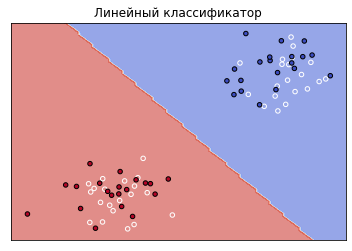

Матрица ошибок:
 [[20  0]
 [ 0 20]]
Опорные векторы: 
 [[0.90356343 0.72236951]
 [0.98510067 0.68430049]
 [0.80835351 0.82126184]
 [0.14874741 0.13128834]
 [0.18027464 0.29152253]
 [0.20454273 0.00740181]]


In [147]:
data = pd.read_csv('lab1_data/svmdata_a.txt', sep='\t')
test_data = pd.read_csv('lab1_data/svmdata_a_test.txt', sep='\t')

X_t = test_data[['X1', 'X2']].to_numpy()
Y_t = preprocessing.LabelEncoder().fit_transform(test_data[:]['Color'])

classifier = svm.SVC(kernel='linear')
X = data[['X1', 'X2']].to_numpy()
Y = data[:]['Color'].to_numpy()
Y = preprocessing.LabelEncoder().fit_transform(Y)

classifier.fit(X, Y)

plot_single_graph(classifier, X_t, Y_t, title='Линейный классификатор', additional_x=X, additiona_y=Y)

print('Матрица ошибок:\n', confusion_matrix(Y_t, classifier.predict(X_t)))
print('Опорные векторы: \n', classifier.support_vectors_)

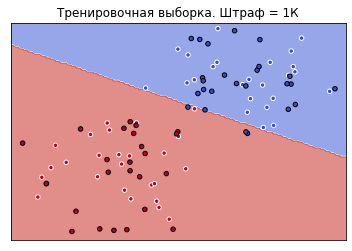

In [150]:
# b. Постройте алгоритм метода опорных векторов с линейным ядром. Добейтесь нулевой ошибки сначала
# на обучающей выборке, а затем на тестовой, путем изменения штрафного параметра. Выберите оптимальное
# значение данного параметра и объясните свой выбор. Всегда ли нужно добиваться минимизации ошибки на
# обучающей выборке?

data = pd.read_csv('lab1_data/svmdata_b.txt', sep='\t')
test_data = pd.read_csv('lab1_data/svmdata_b_test.txt', sep='\t')
X = data[['X1', 'X2']].to_numpy()
Y = preprocessing.LabelEncoder().fit_transform(data[:]['Colors'])
X_t = test_data[['X1', 'X2']].to_numpy()
Y_t = preprocessing.LabelEncoder().fit_transform(test_data[:]['Colors'])

classifier = svm.SVC(kernel='linear', C=1000)
classifier.fit(X, Y)
res = classifier.predict(X)

plot_single_graph(classifier, X_t, Y_t, title='Тренировочная выборка. Штраф = 1К', additional_x=X, additional_y=Y)

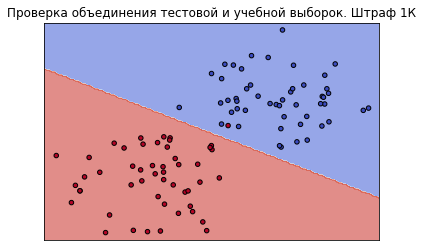

In [149]:
X_all = np.append(X, X_t, axis=0)
Y_all = np.append(Y, Y_t)

classifier.fit(X_all, Y_all)
plot_single_graph(classifier, X_all, Y_all, title='Проверка объединения тестовой и учебной выборок. Штраф 1К')

<p>
Заключение напрашивалось с самого прочтения формулировки задания, поэтому можно, полагаю, перейти к нему без очевидных изысканий. Как видно из рисунка, одно красное данное затесалось промеж синих, что означает невозможность одновременно достигнуть 100% правильности на обоих выборках, придётся чем-то жертвовать.
</p>
<p>
Слишком большой подгон под обучающие данные приведёт к переобучению. Поэтому стоит стремиться не к 100% правильности на обучающей выборке, а к некоторому разумному уровню.
</p>

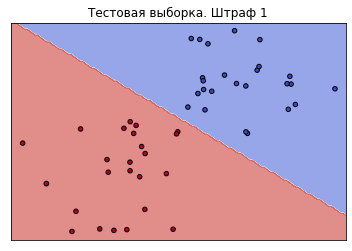

Как видно, не муштрованный классификатор хорошо справился с работой на тестах, хотя и был неидеален при обучении, где его точность была 0.98


In [151]:
# Например тут
Cc = 1
classifier = svm.SVC(kernel='linear', C=Cc)
classifier.fit(X, Y)
acc = accuracy_score(Y, classifier.predict(X))

plot_single_graph(classifier, X_t, Y_t, title=f'Тестовая выборка. Штраф {Cc}')

print(f'Как видно, не муштрованный классификатор хорошо справился с работой на тестах, хотя и был неидеален при обучении, где его точность была {acc}')

*точность выводится в формате точность_на_обучении//точность_на_тесте


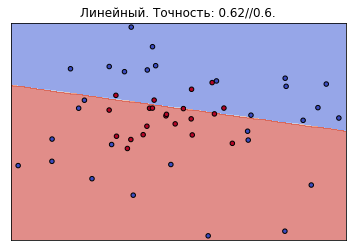

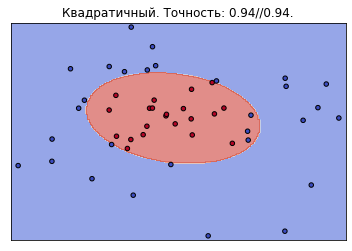

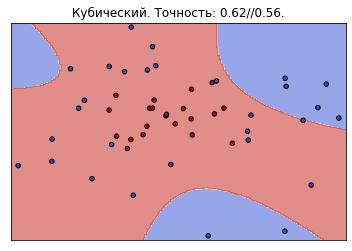

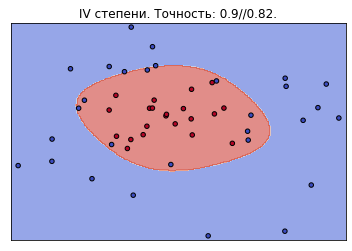

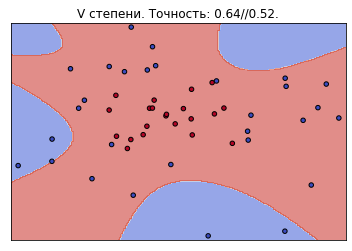

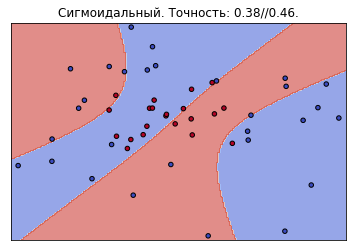

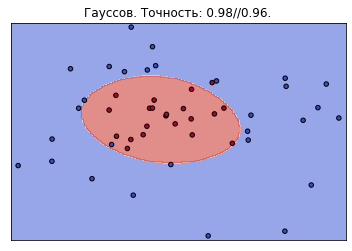

In [152]:
# c 
# Постройте алгоритм метода опорных векторов, используя различные ядра (линейное, полиномиальное степеней 1-5,
# сигмоидальная функция, гауссово). Визуализируйте разбиение пространства признаков на области с помощью
# полученных моделей. Сделайте выводы.

Cc = 2.

classifiers = [ (svm.SVC(kernel='linear', C=Cc, gamma='auto'), 'Линейный.'),
                (svm.SVC(kernel='poly', degree=2, C=Cc, gamma='auto'), "Квадратичный."),
                (svm.SVC(kernel='poly', degree=3, C=Cc, gamma='auto'), "Кубический."),
                (svm.SVC(kernel='poly', degree=4, C=Cc, gamma='auto'), "IV степени."),
                (svm.SVC(kernel='poly', degree=5, C=Cc, gamma='auto'), "V степени."),
                (svm.SVC(kernel='sigmoid', C=Cc, gamma='auto'), "Сигмоидальный."),
                (svm.SVC(kernel='rbf', C=Cc, gamma='auto'), "Гауссов.")]

data = pd.read_csv('lab1_data/svmdata_c.txt', sep='\t')
test_data = pd.read_csv('lab1_data/svmdata_c_test.txt', sep='\t')
X = data[['X1', 'X2']].to_numpy()
Y = preprocessing.LabelEncoder().fit_transform(data[:]['Colors'])
X_t = test_data[['X1', 'X2']].to_numpy()
Y_t = preprocessing.LabelEncoder().fit_transform(test_data[:]['Colors'])

print('*точность выводится в формате точность_на_обучении//точность_на_тесте')

for cls, name in classifiers:
    cls.fit(X, Y)
    acc_l = accuracy_score(Y, cls.predict(X))
    acc_t = accuracy_score(Y_t, cls.predict(X_t))
    
    plot_single_graph(cls, X_t, Y_t, title=name+f' Точность: {acc_l}//{acc_t}.')
    

<p>
    Выводы следующие: <br>
    <ul>
        <li>Данные, оказывается, расположены скоплением одного класса в окружении другого </li>
        <li>Чётность/нечётность степеней полиномиального ядра влияет на замкнутость/незамкнутость границ классов и, следовательно, на результат в нашем случае. Это нужно учитывать при выборе ядра, если известно расположение классов.</li>
        <li>В отличие от полиномов, ограниченных сверху или снизу, или не ограниченных вовсе, сигмоидальное ядро символизирует обратную пропорциональность.</li>
        <li>Гауссово ядро представляет собой подобие эллипсоида. Оно показало наилучшие резельтаты на обучающей и тестовой выборках</li>
    </ul>        

*точность выводится в формате точность_на_обучении//точность_на_тесте


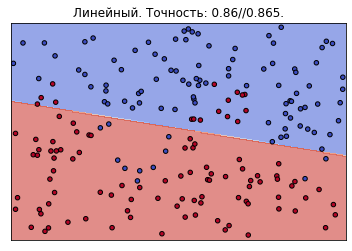

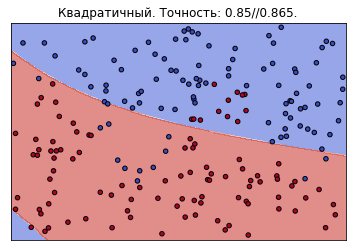

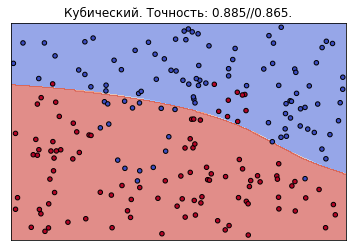

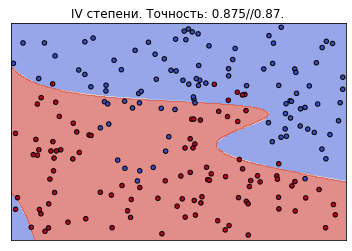

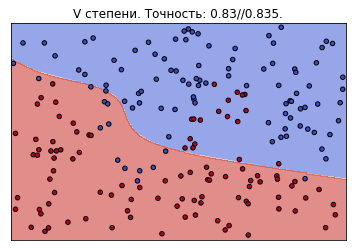

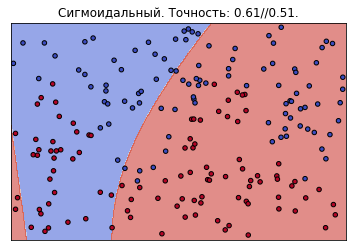

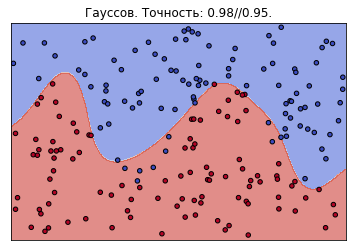

In [153]:
# d.
# По сути то же самое, что и предыдущее задание, но с другими данными

Cc = 2.

classifiers = [ (svm.SVC(kernel='linear', C=Cc, gamma='auto'), 'Линейный.'),
                (svm.SVC(kernel='poly', degree=2, C=Cc, gamma='auto'), "Квадратичный."),
                (svm.SVC(kernel='poly', degree=3, C=Cc, gamma='auto'), "Кубический."),
                (svm.SVC(kernel='poly', degree=4, C=Cc, gamma='auto'), "IV степени."),
                (svm.SVC(kernel='poly', degree=5, C=Cc, gamma='auto'), "V степени."),
                (svm.SVC(kernel='sigmoid', C=Cc, gamma='auto'), "Сигмоидальный."),
                (svm.SVC(kernel='rbf', C=Cc, gamma='auto'), "Гауссов.")]

data = pd.read_csv('lab1_data/svmdata_d.txt', sep='\t')
test_data = pd.read_csv('lab1_data/svmdata_d_test.txt', sep='\t')
X = data[['X1', 'X2']].to_numpy()
Y = preprocessing.LabelEncoder().fit_transform(data[:]['Colors'])
X_t = test_data[['X1', 'X2']].to_numpy()
Y_t = preprocessing.LabelEncoder().fit_transform(test_data[:]['Colors'])

print('*точность выводится в формате точность_на_обучении//точность_на_тесте')

for cls, name in classifiers:
    cls.fit(X, Y)
    acc_l = accuracy_score(Y, cls.predict(X))
    acc_t = accuracy_score(Y_t, cls.predict(X_t))
    
    plot_single_graph(cls, X_t, Y_t, title=name+f' Точность: {acc_l}//{acc_t}.')


<p>
    Ну что ж, гауссово ядро снова в ударе)
</p>

In [ ]:
# e.
# Снова то же самое, но в этот раз нужно добиться эффекта переобучения. 
# Для этого установим большой штрафной параметр gammar

# d.
# По сути то же самое, что и предыдущее задание, но с другими данными

Cc = 1.
gamma = 100.

classifiers = [ (svm.SVC(kernel='linear', C=Cc, gamma=gamma), 'Линейный.'),
                (svm.SVC(kernel='poly', degree=2, C=Cc, gamma=gamma), "Квадратичный."),
                (svm.SVC(kernel='poly', degree=3, C=Cc, gamma=gamma), "Кубический."),
                (svm.SVC(kernel='poly', degree=4, C=Cc, gamma=gamma), "IV степени."),
                (svm.SVC(kernel='poly', degree=5, C=Cc, gamma=gamma), "V степени."),
                (svm.SVC(kernel='sigmoid', C=Cc, gamma=gamma), "Сигмоидальный."),
                (svm.SVC(kernel='rbf', C=Cc, gamma=gamma), "Гауссов.")]

data = pd.read_csv('lab1_data/svmdata_e.txt', sep='\t')
test_data = pd.read_csv('lab1_data/svmdata_e_test.txt', sep='\t')
X = data[['X1', 'X2']].to_numpy()
Y = preprocessing.LabelEncoder().fit_transform(data[:]['Colors'])
X_t = test_data[['X1', 'X2']].to_numpy()
Y_t = preprocessing.LabelEncoder().fit_transform(test_data[:]['Colors'])

#print('На этих графиках одновременно отображаются обучающие и тестовые данные. Обучающие обведены белым')
print('*точность выводится в формате точность_на_обучении//точность_на_тесте')



for cls, name in classifiers:
    cls.fit(X, Y)
    acc_l = accuracy_score(Y, cls.predict(X))
    acc_t = accuracy_score(Y_t, cls.predict(X_t))
    

for cls, name in classifiers:
    acc_l = accuracy_score(Y, cls.predict(X))
    acc_t = accuracy_score(Y_t, cls.predict(X_t))
    plot_single_graph(cls, X, Y, title=name+f'(трен.) Точность: {acc_l:.3}//{acc_t:.3}.', margin=.5)
    plot_single_graph(cls, X_t, Y_t, title=name+f' (тест) Точность: {acc_l:.3}//{acc_t:.3}.', margin=.5)

<p>
    На некоторых моделях получилось достичь 100% точности на обучающей выборке, но не на тестовой. При этом сильно заметна раница в результатах между "удачными" по типу ядра моделями и "неудачными"
</p>

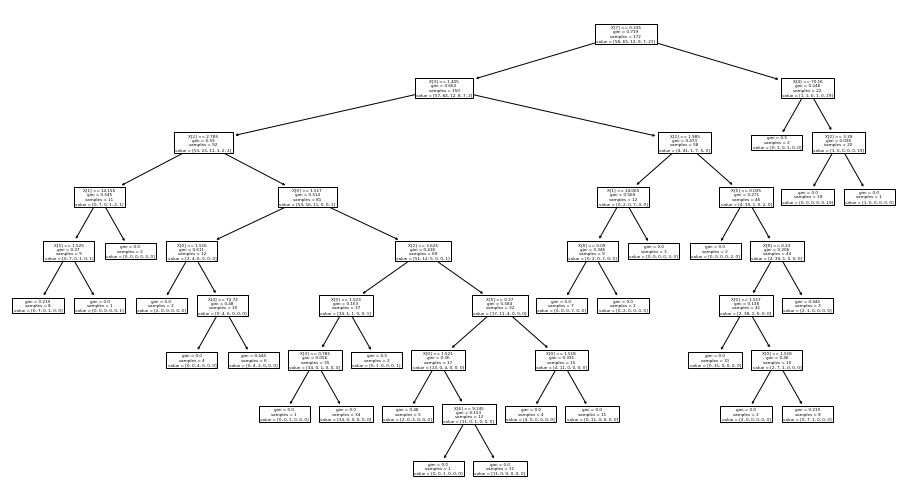

Точность 0.9476744186046512//0.6190476190476191


In [13]:
# 5. Постройте классификаторы для различных данных на основе деревьев решений:
# a. Загрузите набор данных Glass из файла glass.csv.
# Постройте дерево классификации для модели, предсказывающей тип (Type) по остальным признакам.
# Визуализируйте результирующее дерево решения. Дайте интерпретацию полученным результатам.
# Является ли построенное дерево избыточным? Исследуйте зависимость точности классификации от критерия
# расщепления, максимальной глубины дерева и других параметров по вашему усмотрению.

from sklearn import tree
import graphviz
from sklearn.metrics import accuracy_score

data = pd.read_csv('lab1_data/glass.csv').sample(frac=1.)
test_data = data[0:int(np.trunc(len(data)*0.2))]
data = data[int(np.trunc(len(data)*0.2)):]
X = data.loc[:, 'RI': 'Fe'].to_numpy()
Y = data[:]['Type'].to_numpy()
X_t = test_data.loc[:, 'RI': 'Fe'].to_numpy()
Y_t = test_data[:]['Type']

classifier = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=0.05)
classifier.fit(X, Y)

graph_data = tree.export_graphviz(classifier, out_file=None, feature_names=data.columns[1: -1], \
                                  class_names=[f'{i}' for i in np.unique(Y)], filled=True, impurity=False)
graph = graphviz.Source(graph_data)
graph.render('first_tree', format='png', view=False)
#graph  # большой и страшный граф, кооторый попросту не вмещается сюда. 

# Поэтому тут его мини-версия
fig, ax = plt.subplots(figsize=(16,9))
tree.plot_tree(classifier, ax=ax)
plt.show()

print(f'Точность {accuracy_score(Y, classifier.predict(X))}//{accuracy_score(Y_t, classifier.predict(X_t))}')

<p>
    Дерево вышло большое и страшное, но зато вместило все объекты из обучающей выборки. Наложение граничений на глубину должно привести к упрощению топологии дерева за счёт снижения его точности на обучающей и скорее всего тестовой выборках.
</p>

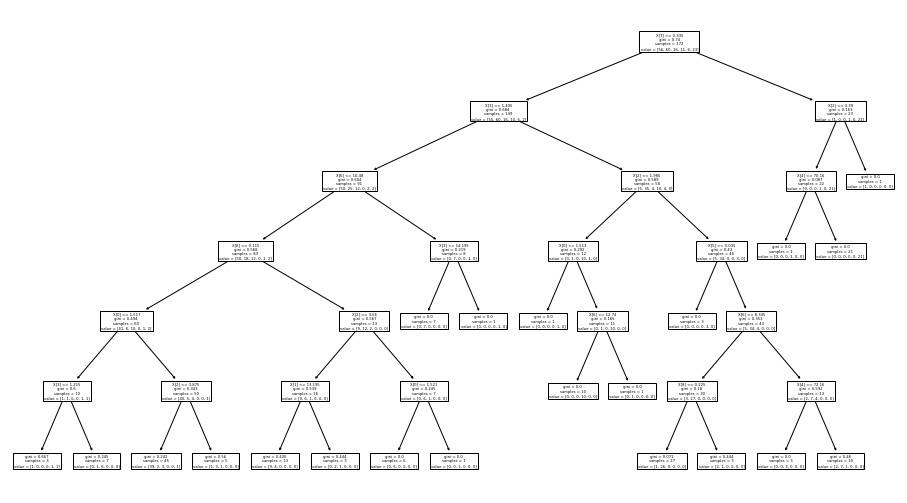

Точность 0.88//0.64


In [9]:
#  Ограничим максимальную глубину шестью
classifier = tree.DecisionTreeClassifier(max_depth=6, min_samples_split=2)
classifier.fit(X, Y)

fig, ax = plt.subplots(figsize=(16,9))
tree.plot_tree(classifier, ax=ax)
plt.show()

print(f'Точность {accuracy_score(Y, classifier.predict(X)):.2}//{accuracy_score(Y_t, classifier.predict(X_t)):.2}')

<p>
Как можно наблюдать, произошло, что ожидалось: точности упали, топология упростилась.
</p>

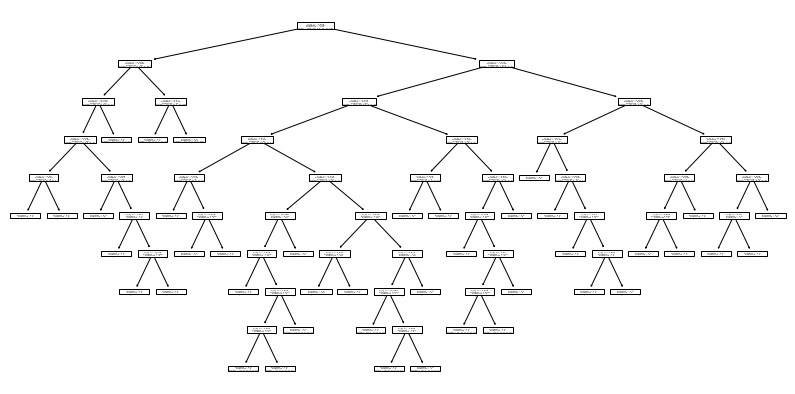

Точность 1.0//0.71


In [12]:
# Попробуем изменить критерий. По умолчанию используется джини, поставим энтропический. 
# Глубину при этом ограничивать не будем

classifier = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2, criterion='entropy')
classifier.fit(X, Y)

fig, ax = plt.subplots(figsize=(14,7))
tree.plot_tree(classifier, ax=ax)
plt.show()

print(f'Точность {accuracy_score(Y, classifier.predict(X)):.2}//{accuracy_score(Y_t, classifier.predict(X_t)):.2}')

<p>
Энтропический классификатор старается делить выборку каждый раз пополам, за счёт чего снизилась глубина дерева (с 11 у Джини да 9 тут), граф стал более центрированным. Хотя он по-прежнему уместил в себя целиком обучающую выборку, он оказаля хуже на тестах, чем классификато Джини
</p>

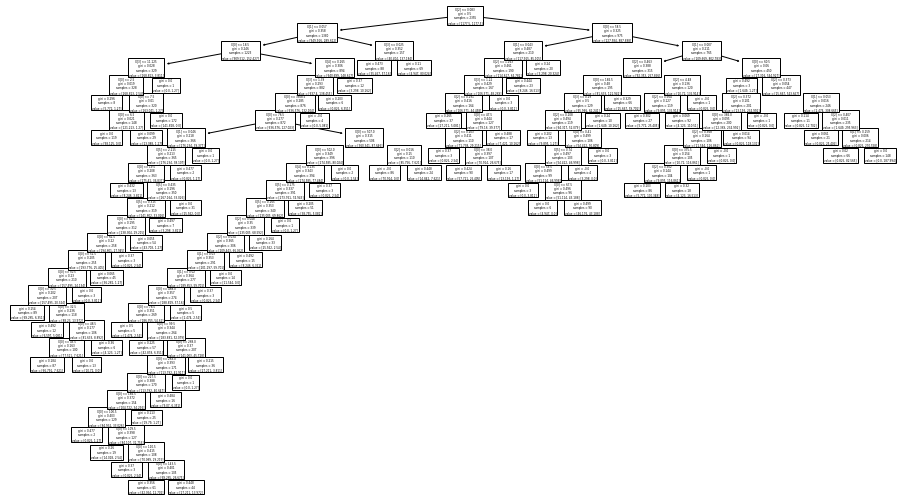

Точность 0.88//0.85


In [16]:
# b. Загрузите набор данных spam7 из файла spam7.csv. Постройте оптимальное, по вашему мнению, дерево
# классификации для параметра yesno. Объясните, как был осуществлён подбор параметров. Визуализируйте
# результирующее дерево решения. Определите наиболее влияющие признаки. Оцените качество классификации.
from sklearn import preprocessing

data = pd.read_csv('lab1_data/spam7.csv').sample(frac=1.)
test_data = data.loc[:int(len(data)*0.2)]
data = data.loc[int(len(data)*0.2):]

X = data.iloc[:, :-1].to_numpy()
Y = preprocessing.LabelEncoder().fit_transform(data[:]['yesno'])
X_t = test_data.iloc[:, :-1].to_numpy()
Y_t = preprocessing.LabelEncoder().fit_transform(test_data[:]['yesno'])

classifier = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=0.04, criterion='gini', \
                                         max_features=None, class_weight='balanced')
# 1. Любопятно, что значение параметра min_samples_split=.04 не только генерирует покрасивей дерево, но и 
#    поднимает точность на тестах чуть-чуть
# 2. Лучшая точность достигается при значении параметра max_features=None
# 3. class_weight='ballanced' позволило на .01 поднять точность на тестах, но дерево снова разбалансировалось
#
#
#
classifier.fit(X, Y)

fig, ax = plt.subplots(figsize=(16,9))
tree.plot_tree(classifier, ax=ax)
plt.show()

print(f'Точность {accuracy_score(Y, classifier.predict(X)):.2}//{accuracy_score(Y_t, classifier.predict(X_t)):.2}')

K = 1   accuracy matrix: 
 [[21952   455]
 [  659   987]]
K = 3   accuracy matrix: 
 [[21987   420]
 [ 1181   465]]
K = 5   accuracy matrix: 
 [[22153   254]
 [ 1441   205]]
K = 7   accuracy matrix: 
 [[22275   132]
 [ 1531   115]]
K = 9   accuracy matrix: 
 [[22344    63]
 [ 1572    74]]
K = 11   accuracy matrix: 
 [[22367    40]
 [ 1588    58]]
K = 13   accuracy matrix: 
 [[22379    28]
 [ 1605    41]]
K = 15   accuracy matrix: 
 [[22386    21]
 [ 1619    27]]
K = 17   accuracy matrix: 
 [[22386    21]
 [ 1624    22]]
K = 19   accuracy matrix: 
 [[22394    13]
 [ 1629    17]]


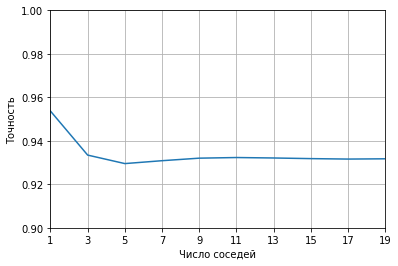

In [19]:
# classifiers tests
# 1. kNN
from sklearn.neighbors import KNeighborsClassifier
neighbours = [1, 3 ,5 ,7, 9, 11, 13, 15, 17, 19 ]
accs = []
for n in neighbours:

    knn = KNeighborsClassifier(n_neighbors=n, n_jobs=4, algorithm='auto'  )
    knn.fit(X, Y)
    #print(f'{n} neighbours, accuracy: {accuracy_score(knn.predict(X_t), Y_t)}')
    print(f'K = {n}   accuracy matrix: \n {confusion_matrix(Y_t, knn.predict(X_t))}')
    accs.append(accuracy_score(knn.predict(X_t), Y_t))
    

plt.plot(neighbours, accs)
plt.grid(True)
plt.ylim(.9, 1)
plt.xlim(1, 19)
plt.xlabel('Число соседей')
plt.ylabel('Точность')
plt.xticks(neighbours, neighbours)
plt.show()

In [79]:
def plot_pr_curve(classifier, X_t, Y_t, comment):

    probs = classifier.predict_proba(X_t)
    preds = probs[:, 1]

    precision, recall, thresholds = precision_recall_curve(Y_t, preds)
    #precision = np.insert(precision, 0, 0)
    #recall = np.insert(recall, 0 , 1)
    plt.title(f'PR-curve. Area: {auc(recall, precision):.3}. {comment}')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot(recall, precision, '-', linewidth=3)
    plt.grid(True)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.show()

In [42]:
# 6. Загрузите набор данных из файла bank_scoring_train.csv. На основе как минимум двух из изученных методов
# постройте классификаторы, предсказывающий значение столбца «SeriousDlqin2yrs». Определите, какой из
# классификаторов сработал лучше. Оцените качество классификации на bank_scoring_test.csv для обоих
# классификаторов.

from sklearn.metrics import confusion_matrix

test_data = pd.read_csv('lab1_data/bank_scoring_test.csv', sep='\t')
data = pd.read_csv('lab1_data/bank_scoring_train.csv', sep='\t')
X = data.iloc[:, 1:].to_numpy()
Y = data.iloc[:, 0].to_numpy()
X_t = test_data.iloc[:, 1:].to_numpy()
Y_t = test_data.iloc[:, 0].to_numpy()

print(f'learn.  0: {len(Y) - sum(Y)}, 1: {sum(Y)}' )
print(f'test.  0: {len(Y_t)} 1: {sum(Y_t)}')

np.array([89592, 6624]) / (89592 + 6624)

learn.  0: 89592, 1: 6624
test.  0: 24053 1: 1646


array([0.9311549, 0.0688451])

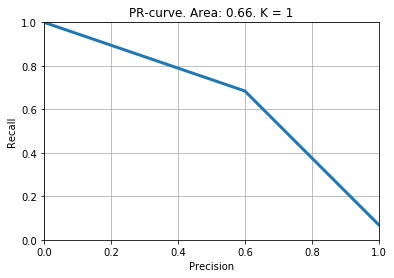

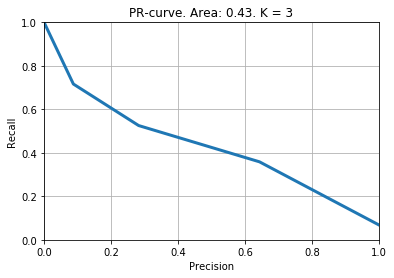

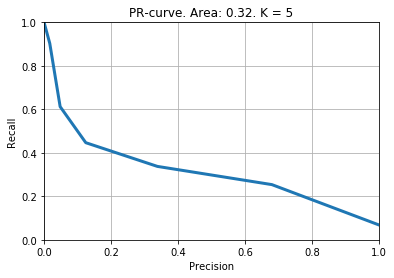

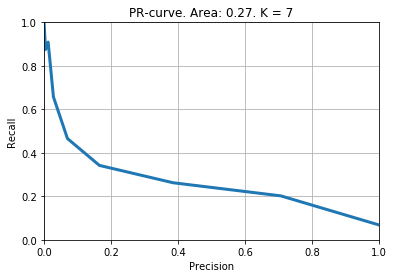

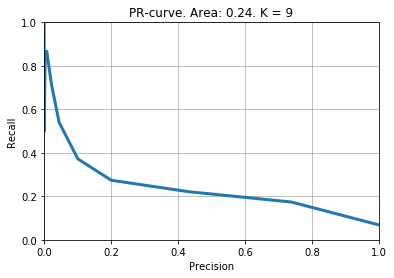

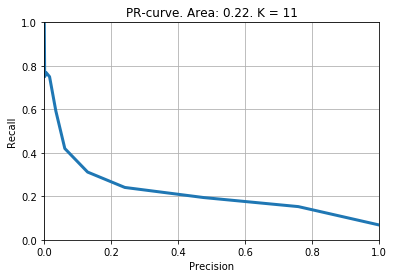

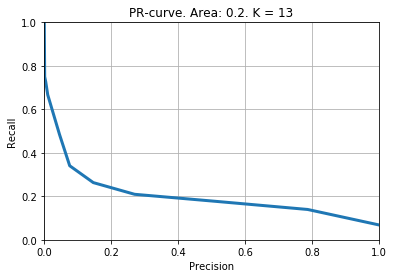

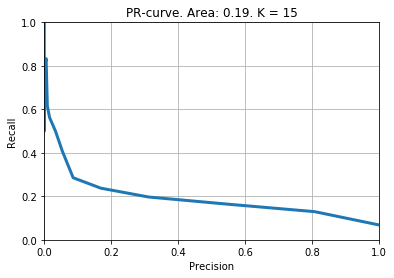

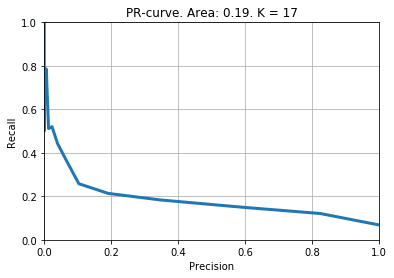

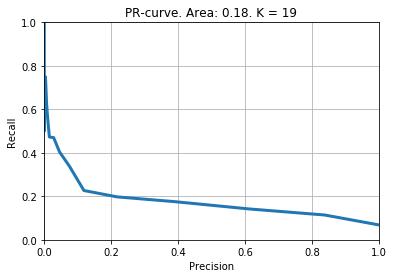

In [77]:
# 1. kNN
from sklearn.neighbors import KNeighborsClassifier
neighbours = [1, 3 ,5 ,7, 9, 11, 13, 15, 17, 19 ]
accs = []
areas = []
for n in neighbours:

    knn = KNeighborsClassifier(n_neighbors=n, n_jobs=4, algorithm='auto'  )
    knn.fit(X, Y)
    #print(f'{n} neighbours, accuracy: {accuracy_score(knn.predict(X_t), Y_t)}')
    accs.append(accuracy_score(knn.predict(X_t), Y_t))
    plot_pr_curve(knn, X_t, Y_t, f'K = {n}')
    
    probs = knn.predict_proba(X_t)
    preds = probs[:, 1]
    precision, recall, thresholds = precision_recall_curve(Y_t, preds)
    areas.append(auc(recall, precision))
    

plt.plot(neighbours, accs)
plt.plot(neighbours, areas)
plt.grid(True)
plt.ylim(.0, 1)
plt.xlim(1, 19)
plt.xlabel('Число соседей')
#plt.ylabel('Точность/Площадь под PR-кривой')
plt.xticks(neighbours, neighbours)
plt.show()

In [ ]:
# 2. SVC
# Эта штука даже один классификатор не может осилить, не то чтобы сравнить несколько :/
# Кроме того, этот код вешает питоновское ядро, и его приходтся насильно перезапускать :/

Cc = 1.
classifiers = [ (svm.SVC(kernel='linear', C=Cc, gamma='auto'), 'Линейный.')
#                (svm.SVC(kernel='poly', degree=2, C=Cc, gamma='auto'), "Квадратичный."),
#                (svm.SVC(kernel='poly', degree=3, C=Cc, gamma='auto'), "Кубический."),
#                (svm.SVC(kernel='poly', degree=4, C=Cc, gamma='auto'), "IV степени."),
#                (svm.SVC(kernel='poly', degree=5, C=Cc, gamma='auto'), "V степени."),
#                (svm.SVC(kernel='sigmoid', C=Cc, gamma='auto'), "Сигмоидальный."),
#                (svm.SVC(kernel='rbf', C=Cc, gamma='auto'), "Гауссов.")
              ]

for cls, name in classifiers:
    cls.fit(X, Y)
    acc_t = accuracy_score(Y_t, cls.predict(X_t))
    
    plot_single_graph(cls, X_t, Y_t, title=name+f' Точность: {acc_t}')

Точность дерева: 0.9525215149877354//0.9525215149877354
Accuracy matrix: 
 [[21812   595]
 [  547  1099]]


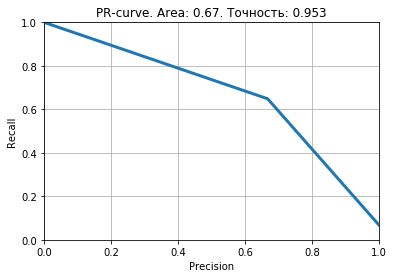

Точность дерева: 0.9332723568785598//0.9332723568785598
Accuracy matrix: 
 [[22199   208]
 [ 1397   249]]


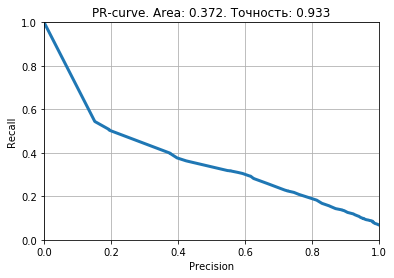

In [78]:
# 3. Дерево решений
from sklearn import tree
from sklearn.metrics import accuracy_score , auc

tr = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2, criterion='gini')
tr.fit(X, Y)

#fig, ax = plt.subplots(figsize=(16,9))
#tree.plot_tree(tr, ax=ax)
#plt.show()

print(f'Точность дерева: {accuracy_score(tr.predict(X_t), Y_t)}//{accuracy_score(tr.predict(X_t), Y_t)}')
print(f'Accuracy matrix: \n {confusion_matrix(Y_t, tr.predict(X_t))}')
#plot_single_graph(tr, X_t, Y_t, ' full tree') # не хватает памяти

probs = tr.predict_proba(X_t)
preds = probs[:, 1]

precision, recall, thresholds = precision_recall_curve(Y_t, preds)
plt.title(f'PR-curve. Area: {auc(recall, precision):.3}. Точность: {accuracy_score(tr.predict(X_t), Y_t):.3}')
#precision = np.insert(precision, 0, 0)
#recall = np.insert(recall, 0 , 1)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(recall, precision, '-', linewidth=3)
plt.grid(True)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()


tr = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=0.04, criterion='gini')
tr.fit(X, Y)

#fig, ax = plt.subplots(figsize=(16,9))
#tree.plot_tree(tr, ax=ax)
#plt.show()

print(f'Точность дерева: {accuracy_score(tr.predict(X_t), Y_t)}//{accuracy_score(tr.predict(X_t), Y_t)}')
print(f'Accuracy matrix: \n {confusion_matrix(Y_t, tr.predict(X_t))}')
#plot_single_graph(tr, X_t, Y_t, ' simple tree') #не хватило памяти

probs = tr.predict_proba(X_t)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_t, preds)
plt.title(f'PR-curve. Area: {auc(recall, precision):.3}. Точность: {accuracy_score(tr.predict(X_t), Y_t):.3}')
#precision = np.insert(precision, 0, 0)
#recall = np.insert(recall, 0 , 1)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(recall, precision, '-', linewidth=3)
plt.grid(True)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()


<p>
    Жуткое и страшное дерево превратилось во вполне красивое за счёт небольшого снижения точности.
</p>

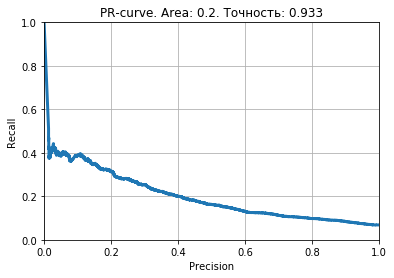

Точность байесовского классификатора: 0.9304065851833375//0.9308194404024446


In [75]:
# 4. Наивный байесовский классификатор
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, Y)

probs = gnb.predict_proba(X_t)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_t, preds)
plt.title(f'PR-curve. Area: {auc(recall, precision):.2}. Точность: {accuracy_score(tr.predict(X), Y):.3}')
#precision = np.insert(precision, 0, 0)
#recall = np.insert(recall, 0 , 1)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(recall, precision, '-', linewidth=3)
plt.grid(True)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()


print(f'Точность байесовского классификатора: {accuracy_score(gnb.predict(X), Y)}//{accuracy_score(gnb.predict(X_t), Y_t)}')

<p>
    Все классификаторы показали примерно одинаковую точность ~0.93. Однако самым тоным на тестовой выборке (~0.95) оказались классификтаоры, основанные на методе ближайшего соседа с евклидовой метрикой и методе дерева решений
</p>

In [28]:
X

array([[9.75614476e-01, 3.90000000e+01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.00000000e+00],
       [6.63425100e-03, 7.50000000e+01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.27431727e-01, 4.80000000e+01, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 3.00000000e+00],
       ...,
       [1.44629790e-01, 5.60000000e+01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [7.72705630e-02, 7.70000000e+01, 0.00000000e+00, ...,
        2.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.07576020e-02, 8.00000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])